In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # line|ar algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-employee-access-challenge/sampleSubmission.csv
/kaggle/input/amazon-employee-access-challenge/train.csv
/kaggle/input/amazon-employee-access-challenge/test.csv


In [2]:
sample = pd.read_csv("/kaggle/input/amazon-employee-access-challenge/sampleSubmission.csv")
sample.head() 

,Id,Action
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [3]:
train = pd.read_csv("/kaggle/input/amazon-employee-access-challenge/train.csv")
train.head() 

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
test = pd.read_csv("/kaggle/input/amazon-employee-access-challenge/test.csv")
test.head()
testd = test.rename(columns={'id':'Id'})
testd

,Id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...,...
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [5]:
train.ACTION = train.ACTION.apply(lambda x: str(x))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACTION            32769 non-null  object
 1   RESOURCE          32769 non-null  int64 
 2   MGR_ID            32769 non-null  int64 
 3   ROLE_ROLLUP_1     32769 non-null  int64 
 4   ROLE_ROLLUP_2     32769 non-null  int64 
 5   ROLE_DEPTNAME     32769 non-null  int64 
 6   ROLE_TITLE        32769 non-null  int64 
 7   ROLE_FAMILY_DESC  32769 non-null  int64 
 8   ROLE_FAMILY       32769 non-null  int64 
 9   ROLE_CODE         32769 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.5+ MB


In [6]:
#test.ACTION = test.ACTION.apply(lambda x: str(x))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [7]:
train.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [8]:
features = ['RESOURCE','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC','ROLE_FAMILY','ROLE_FAMILY','ROLE_CODE']

In [9]:
# train_features = features
# action = ['ACTION']
# train_target = train[action]

In [10]:
role_title_data_1 = train[train.ACTION == 1]['ROLE_DEPTNAME']
role_title_data_0 = train[train.ACTION == 0]['ROLE_DEPTNAME']
Action = train['ACTION']

In [11]:
from collections import Counter

In [12]:
# action_0 = train[train['ACTION'] == 0]
# action_0.count()

In [13]:
# action_1 = train[train['ACTION'] == 1]
# action_1.count()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

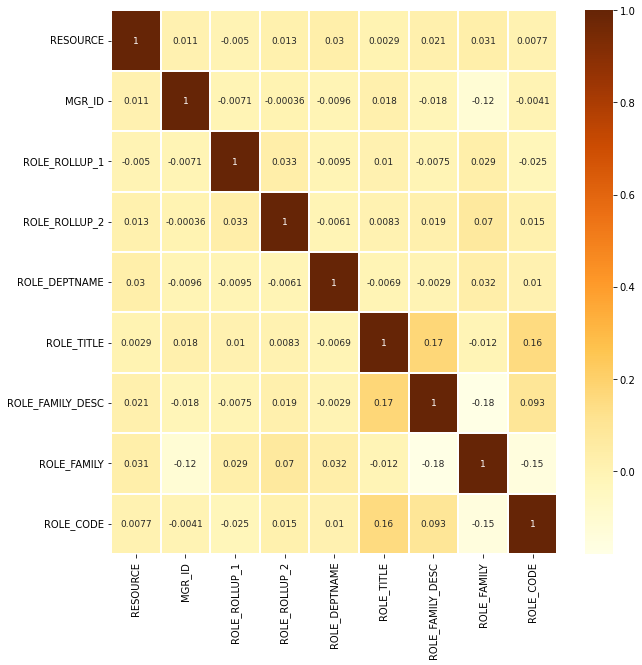

In [15]:
plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(train.corr(), cmap="YlOrBr",annot_kws={'size': 9},linewidths=0.30, annot=True )

In [16]:
# train['ACTION1'] = train['ACTION'].apply(lambda x: str(x))
# train.describe()

In [17]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf2rwu2gk
  JVM stdout: /tmp/tmpf2rwu2gk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf2rwu2gk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,2 months and 27 days
H2O_cluster_name:,H2O_from_python_unknownUser_j0wcai
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [18]:
testf = h2o.H2OFrame(testd)
testf 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1,78766,72734,118079,118080,117878,117879,118177,19721,117880
2,40644,4378,117961,118327,118507,118863,122008,118398,118865
3,75443,2395,117961,118300,119488,118172,301534,249618,118175
4,43219,19986,117961,118225,118403,120773,136187,118960,120774
5,42093,50015,117961,118343,119598,118422,300136,118424,118425
6,44722,1755,117961,117962,119223,125793,146749,118643,125795
7,75834,21135,117961,118343,123494,118054,118054,117887,118055
8,4675,3077,117961,118300,120312,124194,124195,118363,124196
9,18072,15575,117902,118041,118623,280788,280788,292795,119082
10,22680,4474,117961,118446,119064,118321,118448,290919,118322


In [19]:
train_df = h2o.H2OFrame(train)
train_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:32769
Cols:10

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
type,int,int,int,int,int,int,int,int,int,int
mins,0.0,0.0,25.0,4292.0,23779.0,4674.0,117879.0,4673.0,3130.0,117880.0
mean,0.9421099209618847,42923.9161707711,25988.957978577444,116952.62778845849,118301.82315603136,118912.77991394266,125916.15264426656,170178.3696481418,183703.40889255135,119789.43013213827
maxs,1.0,312153.0,311696.0,311178.0,286791.0,286792.0,311867.0,311867.0,308574.0,270691.0
sigma,0.2335390378067631,34173.892702138226,35928.03165014052,10875.563591093729,4551.588572012566,18961.322917087753,31036.465824743354,69509.46213012998,100488.40741337695,5784.275515531041
zeros,1897,13,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,1.0,39353.0,85475.0,117961.0,118300.0,123472.0,117905.0,117906.0,290919.0,117908.0
1,1.0,17183.0,1540.0,117961.0,118343.0,123125.0,118536.0,118536.0,308574.0,118539.0
2,1.0,36724.0,14457.0,118219.0,118220.0,117884.0,117879.0,267952.0,19721.0,117880.0


In [20]:
test_df = h2o.H2OFrame(testd.drop('Id',axis=1))
test_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
78766,72734,118079,118080,117878,117879,118177,19721,117880
40644,4378,117961,118327,118507,118863,122008,118398,118865
75443,2395,117961,118300,119488,118172,301534,249618,118175
43219,19986,117961,118225,118403,120773,136187,118960,120774
42093,50015,117961,118343,119598,118422,300136,118424,118425
44722,1755,117961,117962,119223,125793,146749,118643,125795
75834,21135,117961,118343,123494,118054,118054,117887,118055
4675,3077,117961,118300,120312,124194,124195,118363,124196
18072,15575,117902,118041,118623,280788,280788,292795,119082
22680,4474,117961,118446,119064,118321,118448,290919,118322


In [21]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
encoding = "one_hot_explicit"

In [22]:
train_df.describe()

Rows:32769
Cols:10

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
type,int,int,int,int,int,int,int,int,int,int
mins,0.0,0.0,25.0,4292.0,23779.0,4674.0,117879.0,4673.0,3130.0,117880.0
mean,0.9421099209618847,42923.9161707711,25988.957978577444,116952.62778845849,118301.82315603136,118912.77991394266,125916.15264426656,170178.3696481418,183703.40889255135,119789.43013213827
maxs,1.0,312153.0,311696.0,311178.0,286791.0,286792.0,311867.0,311867.0,308574.0,270691.0
sigma,0.2335390378067631,34173.892702138226,35928.03165014052,10875.563591093729,4551.588572012566,18961.322917087753,31036.465824743354,69509.46213012998,100488.40741337695,5784.275515531041
zeros,1897,13,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,1.0,39353.0,85475.0,117961.0,118300.0,123472.0,117905.0,117906.0,290919.0,117908.0
1,1.0,17183.0,1540.0,117961.0,118343.0,123125.0,118536.0,118536.0,308574.0,118539.0
2,1.0,36724.0,14457.0,118219.0,118220.0,117884.0,117879.0,267952.0,19721.0,117880.0


In [23]:
aml = H2OAutoML(max_models =25,seed =1)

In [24]:
#encoding = "OneHotExplicit"
#from h2o.automl import H2OAutoML
#aml = H2OAutoML(max_runtime_secs = 600,
 #               # exclude_algos =['DeepLearning'],
  #              seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
   #             balance_classes = False)
#aml.train(x = features, y='ACTION',training_frame=train_df)

In [25]:
train_df['ACTION'] = train_df['ACTION'].asfactor()
train_df

ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
1,36724,14457,118219,118220,117884,117879,267952,19721,117880
1,36135,5396,117961,118343,119993,118321,240983,290919,118322
1,42680,5905,117929,117930,119569,119323,123932,19793,119325
0,45333,14561,117951,117952,118008,118568,118568,19721,118570
1,25993,17227,117961,118343,123476,118980,301534,118295,118982
1,19666,4209,117961,117969,118910,126820,269034,118638,126822
1,31246,783,117961,118413,120584,128230,302830,4673,128231
1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [26]:
aml.train(training_frame = train_df, y = 'ACTION', x=list(set(train_df.names) - set(["ACTION"])))

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230219_181943

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.020910782843297795
RMSE: 0.14460561138246952
LogLoss: 0.08043447227462977
AUC: 0.9902951334407977
AUCPR: 0.9993942752521259
Gini: 0.9805902668815953
Null degrees of freedom: 10083
Residual degrees of freedom: 10072
Null deviance: 4488.805293437096
Residual deviance: 1622.2024368347336
AIC: 1646.2024368347336

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6935963442597478
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      466  123   0.2088   (123.0/589.0)
1      129  9366  0.0136   (129.0/9495.0)
Total  595  9489  0.025    (252.0/10084.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.693596     0.986726  238
max f2                       0.409805     0.992151  316
max f0point5                 0.805124     0.989345  197
max accuracy                 0.693596     0.97501   238
max precision                0.999231     1         0
max recall                   0.223436     1         363
max specificity              0.999231     1         0
max absolute_mcc             0.693596     0.773899  238
max min_per_class_accuracy   0.856053     0.954397  173
max mean_per_class_accuracy  0.883578     0.960377  158
max tns                      0.999231     589       0
max fns                      0.999231     9424      0
max fps                      0.0492039    589       399
max tps                      0.223436     9495      363
max tnr                      0.999231     1         0
max fnr                      0.999231     0.992522  0
max fpr                      0.0492039    1         399
max tpr                      0.223436     1         363

Gains/Lift Table: Avg response rate: 94.16 %, avg score: 93.59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100159                   0.998807           1.06203   1.06203            1                0.999136  1                           0.999136            0.0106372       0.0106372                  6.20326   6.20326            0.0106372
2        0.0200317                   0.998369           1.06203   1.06203            1                0.99857   1                           0.998853            0.0106372       0.0212744                  6.20326   6.20326            0.0212744
3        0.0300476                   0.997957           1.06203   1.06203            1                0.998152  1                           0.99862             0.0106372       0.0319115                  6.20326   6.20326            0.0319115
4        0.0400635                   0.997645           1.06203   1.06203            1                0.997791  1                           0.998413            0.0106372       0.0425487                  6.20326   6.20326            0.0425487
5        0.0500793                   0.997352           1.06203   1.06203            1                0.997496  1                           0.998229            0.0106372       0.0531859                  6.20326   6.20326            0.0531859
6        0.10006                     0.99597            1.06203   1.06203            1                0.996622  1                           0.997426            0.0530806       0.106266                   6.20326   6.

In [27]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20230219_181943,0.860134,0.151594,0.985869,0.345757,0.197649,0.0390651
StackedEnsemble_BestOfFamily_1_AutoML_1_20230219_181943,0.859165,0.152913,0.985574,0.356131,0.198021,0.0392125
GBM_grid_1_AutoML_1_20230219_181943_model_4,0.855024,0.15547,0.986076,0.36478,0.200358,0.0401432
GBM_grid_1_AutoML_1_20230219_181943_model_1,0.851314,0.159312,0.985605,0.363851,0.204566,0.0418471
DRF_1_AutoML_1_20230219_181943,0.846396,0.180627,0.98382,0.350862,0.201661,0.0406671
XRT_1_AutoML_1_20230219_181943,0.845842,0.171134,0.984094,0.349552,0.202088,0.0408396
GBM_4_AutoML_1_20230219_181943,0.844398,0.159108,0.984013,0.366138,0.202531,0.0410188
XGBoost_grid_1_AutoML_1_20230219_181943_model_4,0.843787,0.159888,0.984421,0.370089,0.202324,0.0409352
XGBoost_grid_1_AutoML_1_20230219_181943_model_2,0.842843,0.159931,0.984393,0.355424,0.201811,0.0407278
GBM_1_AutoML_1_20230219_181943,0.842645,0.161583,0.984729,0.36999,0.204398,0.0417787


In [28]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230219_181943

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.020910782843297795
RMSE: 0.14460561138246952
LogLoss: 0.08043447227462977
AUC: 0.9902951334407977
AUCPR: 0.9993942752521259
Gini: 0.9805902668815953
Null degrees of freedom: 10083
Residual degrees of freedom: 10072
Null deviance: 4488.805293437096
Residual deviance: 1622.2024368347336
AIC: 1646.2024368347336

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6935963442597478
       0    1     Error    Rate
-----  ---  ----  -------  ---------------
0      466  123   0.2088   (123.0/589.0)
1      129  9366  0.0136   (129.0/9495.0)
Total  595  9489  0.025    (252.0/10084.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f

In [29]:
# test_df = test.drop('id',axis = 1)
# test_df

In [30]:
pred = best_model.predict(test_df)   
pred

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.0442601,0.95574
1,0.0091103,0.99089
1,0.00423088,0.995769
1,0.0205771,0.979423
1,0.00227461,0.997725
1,0.00351594,0.996484
1,0.0192148,0.980785
1,0.00194476,0.998055
1,0.199117,0.800883
1,0.0282953,0.971705


In [31]:
pred["predict"].unique()

C1
0
1


In [32]:
test_with_predictions = test_df.cbind(pred['predict'])
test_with_predictions = test_with_predictions.rename(columns={'predict': 'Action'})
test_with_predictions

RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,Action
78766,72734,118079,118080,117878,117879,118177,19721,117880,1
40644,4378,117961,118327,118507,118863,122008,118398,118865,1
75443,2395,117961,118300,119488,118172,301534,249618,118175,1
43219,19986,117961,118225,118403,120773,136187,118960,120774,1
42093,50015,117961,118343,119598,118422,300136,118424,118425,1
44722,1755,117961,117962,119223,125793,146749,118643,125795,1
75834,21135,117961,118343,123494,118054,118054,117887,118055,1
4675,3077,117961,118300,120312,124194,124195,118363,124196,1
18072,15575,117902,118041,118623,280788,280788,292795,119082,1
22680,4474,117961,118446,119064,118321,118448,290919,118322,1


In [33]:
df=testf.cbind(test_with_predictions['Action'])


In [34]:
submission = df.drop(['RESOURCE','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC','ROLE_FAMILY','ROLE_CODE'],axis = 1)
print(submission)
h2o.export_file(submission, path = "submission.csv", force = True,)

  Id    Action
   1         1
   2         1
   3         1
   4         1
   5         1
   6         1
   7         1
   8         1
   9         1
  10         1
[58921 rows x 2 columns]

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [35]:
pd.read_csv("submission.csv")

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
58916,58917,1
58917,58918,1
58918,58919,1
58919,58920,1


In [36]:
Sub_df = pd.read_csv("submission.csv")

In [37]:
output = Sub_df['Action'].unique()
output

array([1, 0])